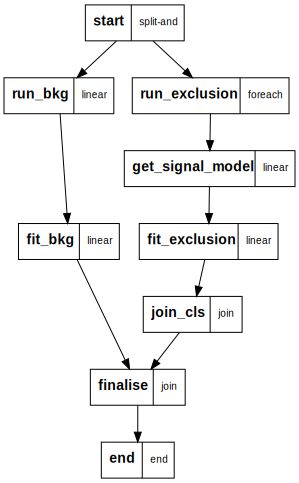

In [87]:
import graphviz
import sys
import subprocess
dot_graph = subprocess.check_output('python GenerateLimits.py output-dot',shell=True).decode(sys.stdout.encoding).strip()
graphviz.Source(dot_graph.replace('rankdir=LR','rankdir=TB'))

In [75]:
from metaflow import Flow, get_metadata
print("Current metadata provider: %s" % get_metadata())
run = Flow('GenerateLimits').latest_successful_run
print("Using run: %s" % str(run))

Current metadata provider: local@/Users/calummacdonald/Learning/metaflow/susy-limit
Using run: Run('GenerateLimits/1604495688383451')


In [76]:
run.data

<MetaflowData: region, results, name>

In [79]:
import pandas as pd
df_results = pd.DataFrame.from_records(run.data.results['signal_cls'])
df_results

,signal,CLs_obs,CLs_exp
0,sbottom_1000_131_1,0.991178,0.992397
1,sbottom_1000_205_60,0.942395,0.961422


In [52]:
df_results_m60 = df_results[df_results['signal'].str.endswith('_60')]
df_results_m60

,signal,CLs_obs,CLs_exp
1,sbottom_1000_205_60,9.423946e-01,9.614218e-01
3,sbottom_1000_250_60,9.540555e-01,9.697295e-01
5,sbottom_1000_350_60,6.781033e-01,5.252983e-01
7,sbottom_1000_450_60,1.597040e-02,2.577627e-03
10,sbottom_1000_650_60,2.122654e-05,1.750081e-06
...,...,...,...
206,sbottom_900_550_60,1.596330e-06,7.471420e-08
208,sbottom_900_650_60,7.091696e-12,1.265446e-13
210,sbottom_900_750_60,8.340967e-18,1.071591e-19
212,sbottom_900_850_60,8.859418e-27,5.682121e-29


In [60]:
df_results_m60[['sbottom mass','neutralino2 mass']] = df_results_m60['signal'].str.split('_',expand=True)[[1,2]].astype(int)
df_results_m60

,signal,CLs_obs,CLs_exp,sbottom mass,neutralino2 mass
1,sbottom_1000_205_60,9.423946e-01,9.614218e-01,1000,205
3,sbottom_1000_250_60,9.540555e-01,9.697295e-01,1000,250
5,sbottom_1000_350_60,6.781033e-01,5.252983e-01,1000,350
7,sbottom_1000_450_60,1.597040e-02,2.577627e-03,1000,450
10,sbottom_1000_650_60,2.122654e-05,1.750081e-06,1000,650
...,...,...,...,...,...
206,sbottom_900_550_60,1.596330e-06,7.471420e-08,900,550
208,sbottom_900_650_60,7.091696e-12,1.265446e-13,900,650
210,sbottom_900_750_60,8.340967e-18,1.071591e-19,900,750
212,sbottom_900_850_60,8.859418e-27,5.682121e-29,900,850


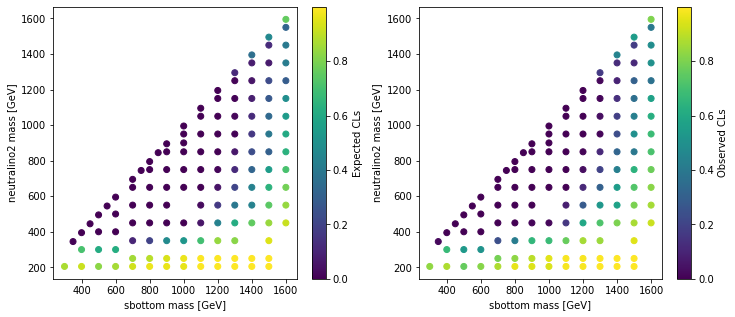

In [72]:
import matplotlib.pyplot as plt

x,y,z = df_results_m60['sbottom mass'],df_results_m60['neutralino2 mass'],df_results_m60['CLs_exp']

fig,ax = plt.subplots(1,2,figsize=(12,5))
sc = ax[0].scatter(x,y,c=z)
cbar = plt.colorbar(sc, ax=ax[0])
ax[0].set_xlabel('sbottom mass [GeV]')
ax[0].set_ylabel('neutralino2 mass [GeV]')
cbar.set_label('Expected CLs');

z = df_results_m60['CLs_obs']

sc = ax[1].scatter(x,y,c=z)
cbar = plt.colorbar(sc, ax=ax[1])
ax[1].set_xlabel('sbottom mass [GeV]')
ax[1].set_ylabel('neutralino2 mass [GeV]')
cbar.set_label('Observed CLs')

plt.show();

In [84]:
bkg_fit = run.data.results['bkg_fit']
bkg_fit

{'init': [143.0,
  73.0,
  28.0,
  12.0,
  4.0,
  3.0,
  118.0,
  242.0,
  141.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'bestfit': [1.0002028180066518,
  1.0016578134791645,
  0.00032305342903992654,
  0.036378366397562645,
  0.023231798556718745,
  0.0043814474646222765,
  0.0003202039237484956,
  0.0012176221151245937,
  0.09978917948436895,
  -0.023652603204460637,
  0.2671950541475354,
  0.05262728014033881,
  -0.033061495729707194,
  0.03772974622678393,
  0.0003228085103859592,
  0.00032427129627305367,
  0.001179425300910918,
  0.006366585489986661,
  0.

In [86]:
len(bkg_fit['init']),len(bkg_fit['bestfit'])

(76, 69)